In [58]:
import kaggle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import shapiro, normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Download the IBM HR dataset
kaggle.api.dataset_download_files('pavansubhasht/ibm-hr-analytics-attrition-dataset', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 1 - Análise Exploratória

### Overview Geral da Base de dados

In [5]:
def data_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100,
        'Sample Unique Values': df.apply(lambda x: list(x.dropna().unique())[:5])  # Show first 5 unique values
    })
    
    return summary.sort_values(by="Missing %", ascending=False)

In [6]:
display(df.head())
print(f"Dataset Shape: {df.shape}") 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Dataset Shape: (1470, 35)


In [7]:
summary_table = data_summary(df)
display(summary_table)

,Data Type,Unique Values,Missing Values,Missing %,Sample Unique Values
Age,int64,43,0,0.0,"[41, 49, 37, 33, 27]"
StandardHours,int64,1,0,0.0,[80]
NumCompaniesWorked,int64,10,0,0.0,"[8, 1, 6, 9, 0]"
Over18,object,1,0,0.0,[Y]
OverTime,object,2,0,0.0,"[Yes, No]"
PercentSalaryHike,int64,15,0,0.0,"[11, 23, 15, 12, 13]"
PerformanceRating,int64,2,0,0.0,"[3, 4]"
RelationshipSatisfaction,int64,4,0,0.0,"[1, 4, 2, 3]"
StockOptionLevel,int64,4,0,0.0,"[0, 1, 3, 2]"
MonthlyIncome,int64,1349,0,0.0,"[5993, 5130, 2090, 2909, 3468]"


A partir da tabela acima pode-se concluir que as colunas EmployeeCount, EmployeeNumber, Over18 e StandardHours não serão úteis em nossa análise, seja porque todas as linhas possuem o mesmo valor ou pelo fato da informação ser irrelevante para nosso objetivo (EmployeeNumber).  

Assim, essas colunas serão retiradas da base de dados.

In [8]:
columns_to_drop = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]

df.drop(columns=columns_to_drop, inplace=True)

### Linhas Duplicadas

In [9]:
duplicate_rows = df.duplicated().sum()
print(f"Total Duplicated Rows: {duplicate_rows}")

Total Duplicated Rows: 0


### Análise da Variável Alvo

In [10]:
def target_variable_analysis(df, target_col="Attrition"):
    summary = df[target_col].value_counts().to_frame(name="Count")
    summary["Percentage"] = (summary["Count"] / summary["Count"].sum()) * 100
    summary["Percentage"] = summary["Percentage"].apply(lambda x: f"{x:.2f}%")

    
    summary["Mean Salary"] = df.groupby(target_col)["MonthlyIncome"].mean().round(2)
    summary["Median Salary"] = df.groupby(target_col)["MonthlyIncome"].median().round(2)
    
    summary["Mean Tenure"] = df.groupby(target_col)["YearsAtCompany"].mean().round(2)
    summary["Median Tenure"] = df.groupby(target_col)["YearsAtCompany"].median().round(2)
    
    print("\nTarget Variable Summary:")
    display(summary)

    # Attrition Distribution
    plt.figure(figsize=(6,4))
    sns.barplot(x=summary.index, y=summary["Count"], palette=["blue", "red"])
    plt.title("Attrition Count Distribution")
    plt.xlabel("Attrition")
    plt.ylabel("Count")
    plt.show()

    # Attrition Rate by Department
    plt.figure(figsize=(8,4))
    attrition_dept = df.groupby("Department")[target_col].value_counts(normalize=True).unstack() * 100
    attrition_dept.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8,4))
    plt.title("Attrition Rate by Department")
    plt.ylabel("Percentage")
    plt.show()

    # Monthly Income by Attrition
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target_col], y=df["MonthlyIncome"], palette=["blue", "red"])
    plt.title("Attrition vs Monthly Income")
    plt.xlabel("Attrition")
    plt.ylabel("Monthly Income")
    plt.show()


Target Variable Summary:


,Count,Percentage,Mean Salary,Median Salary,Mean Tenure,Median Tenure
No,1233,83.88%,6832.74,5204.0,7.37,6.0
Yes,237,16.12%,4787.09,3202.0,5.13,3.0


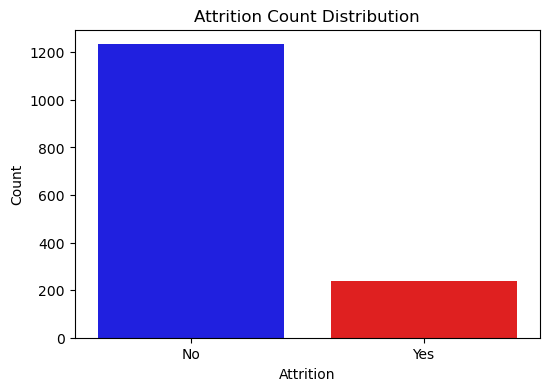

<Figure size 800x400 with 0 Axes>

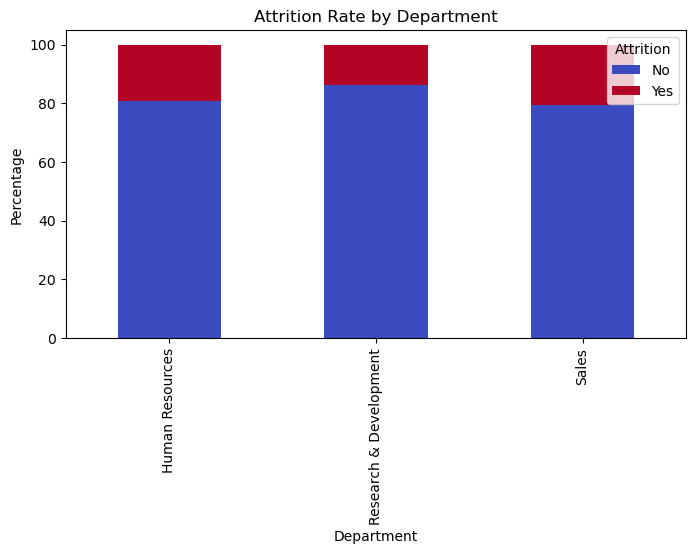

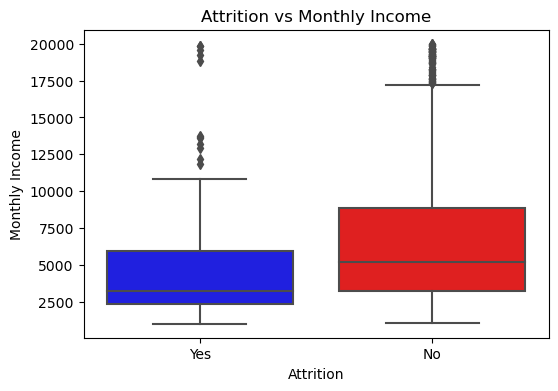

In [11]:
target_variable_analysis(df)

### Análise da Distribuição das Features

In [12]:
# Convert to categorical
categorical_numerical_cols = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement", 
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", 
    "WorkLifeBalance"
]

df[categorical_numerical_cols] = df[categorical_numerical_cols].astype("category")

- Colunas Numéricas

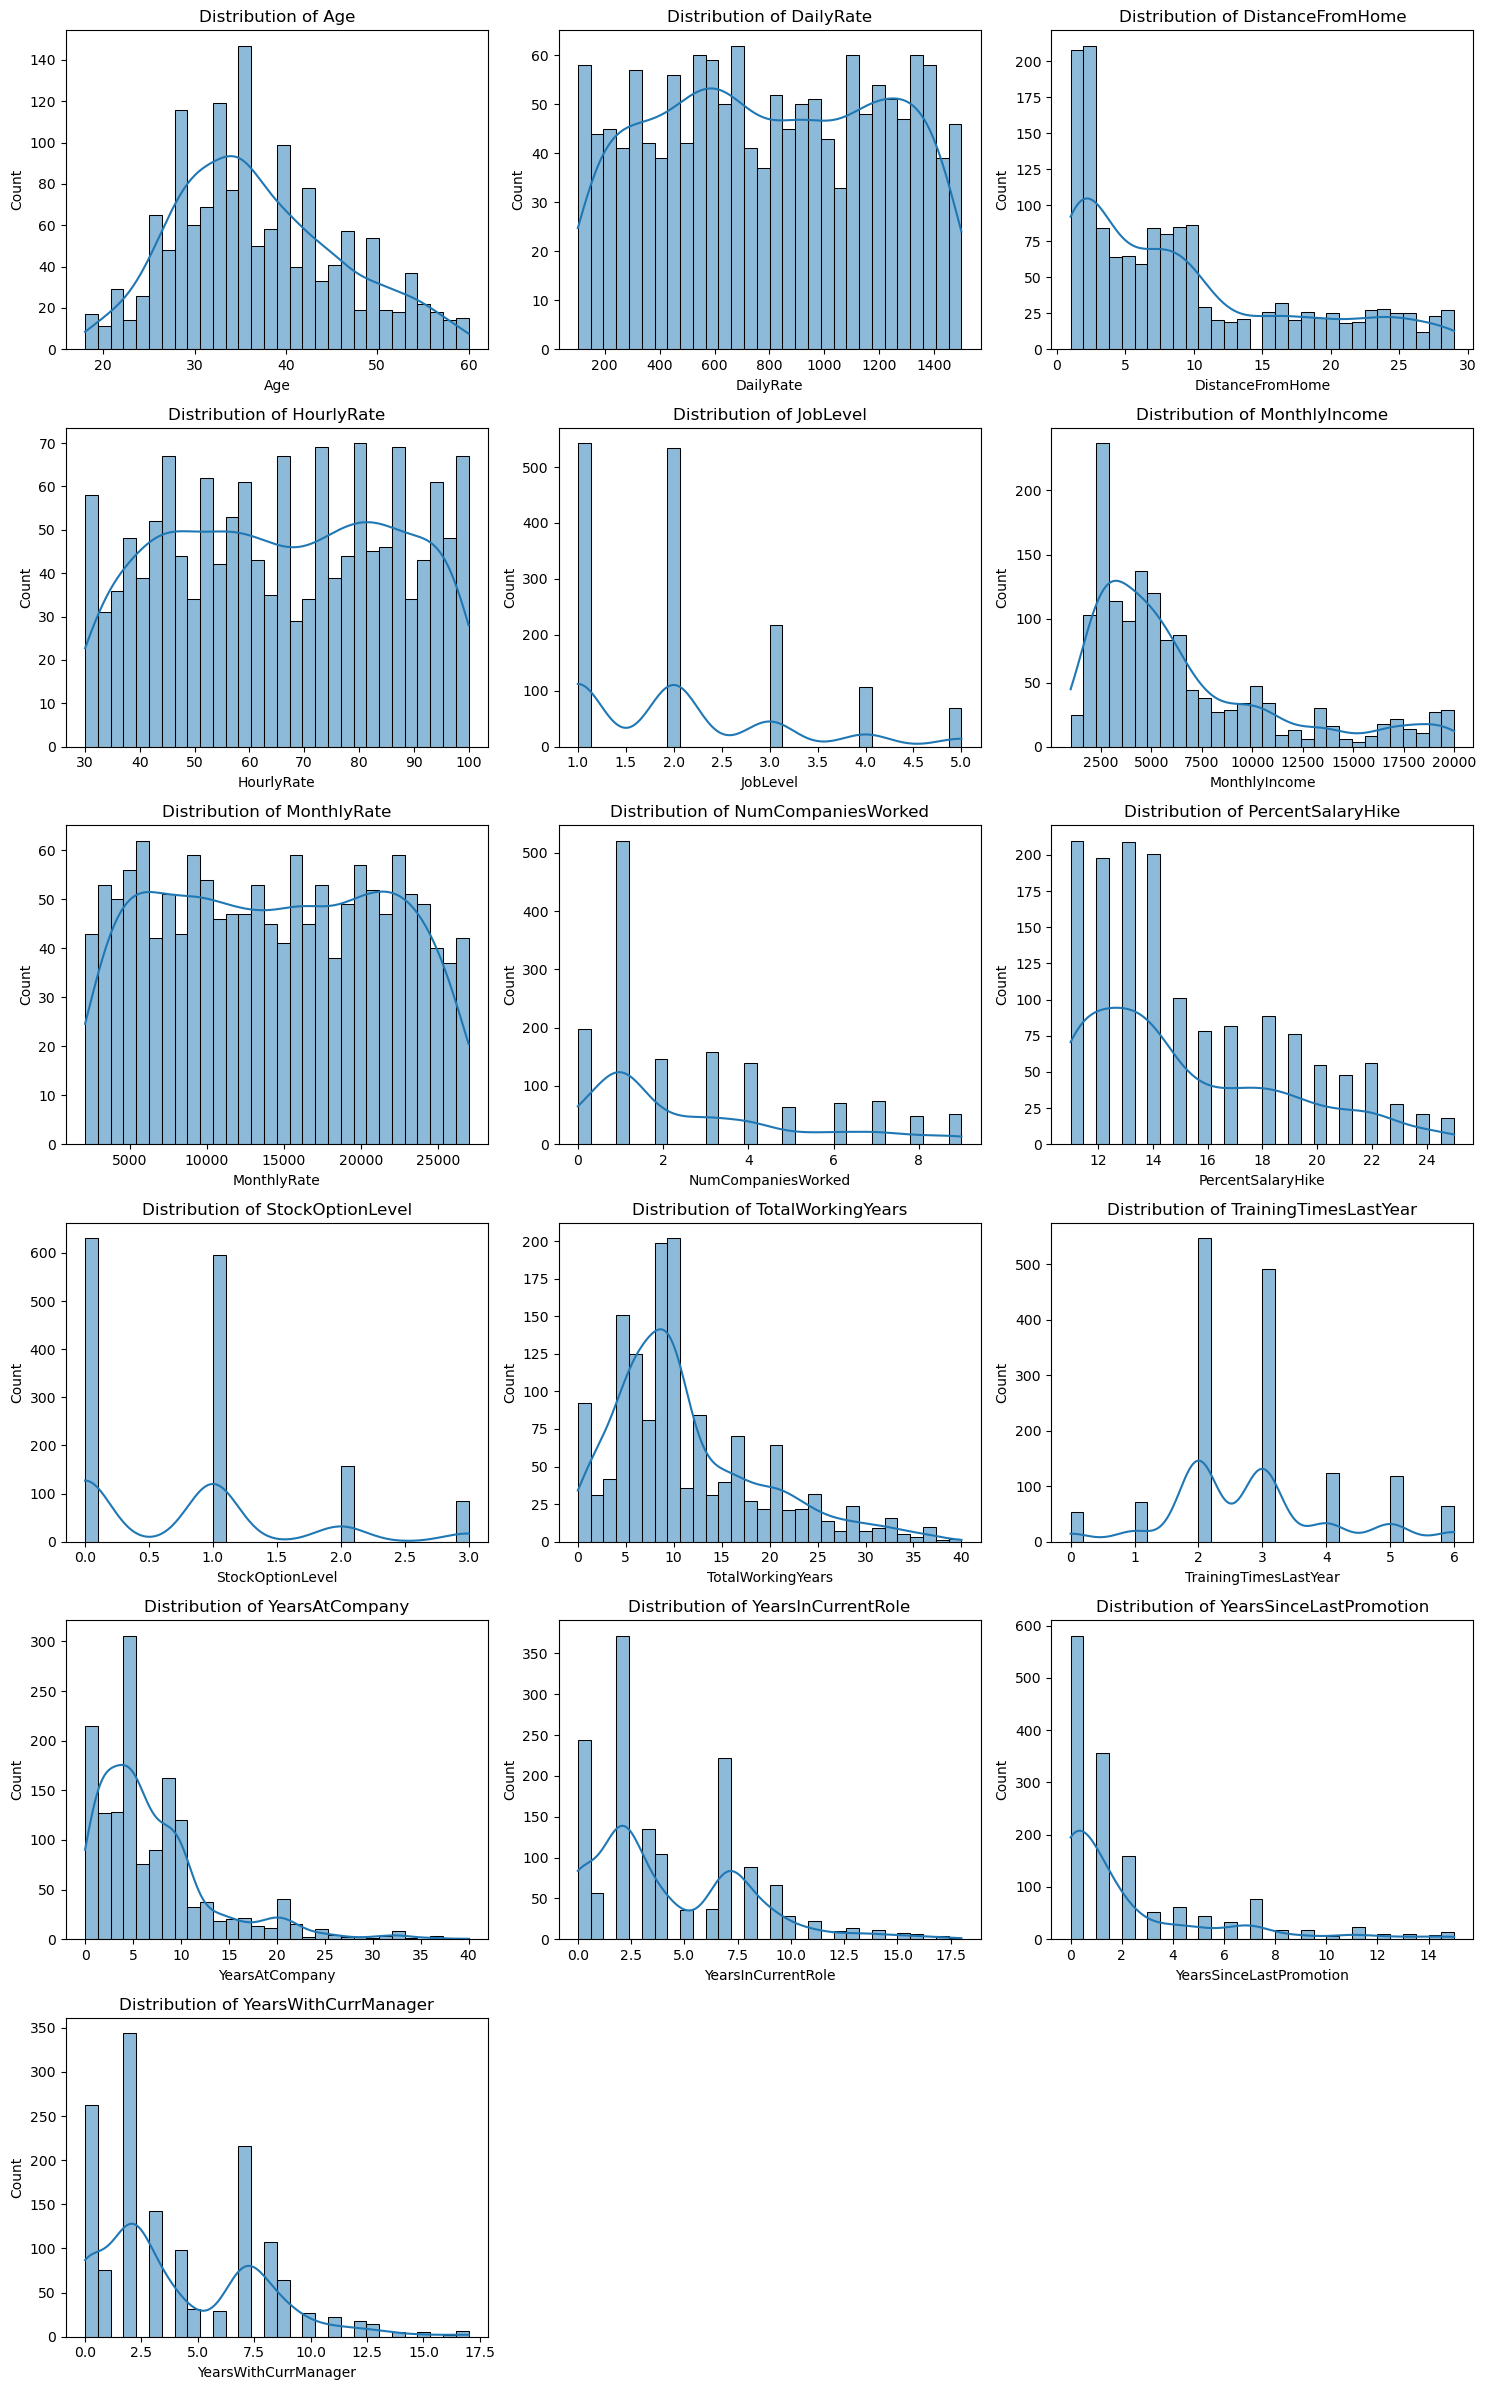

In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(15, 4 * (len(num_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Variáveis Categóricas

In [14]:
category_labels = {
    "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
    "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
    "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
}

# Apply category labels
for col, mapping in category_labels.items():
    df[col] = df[col].map(mapping)

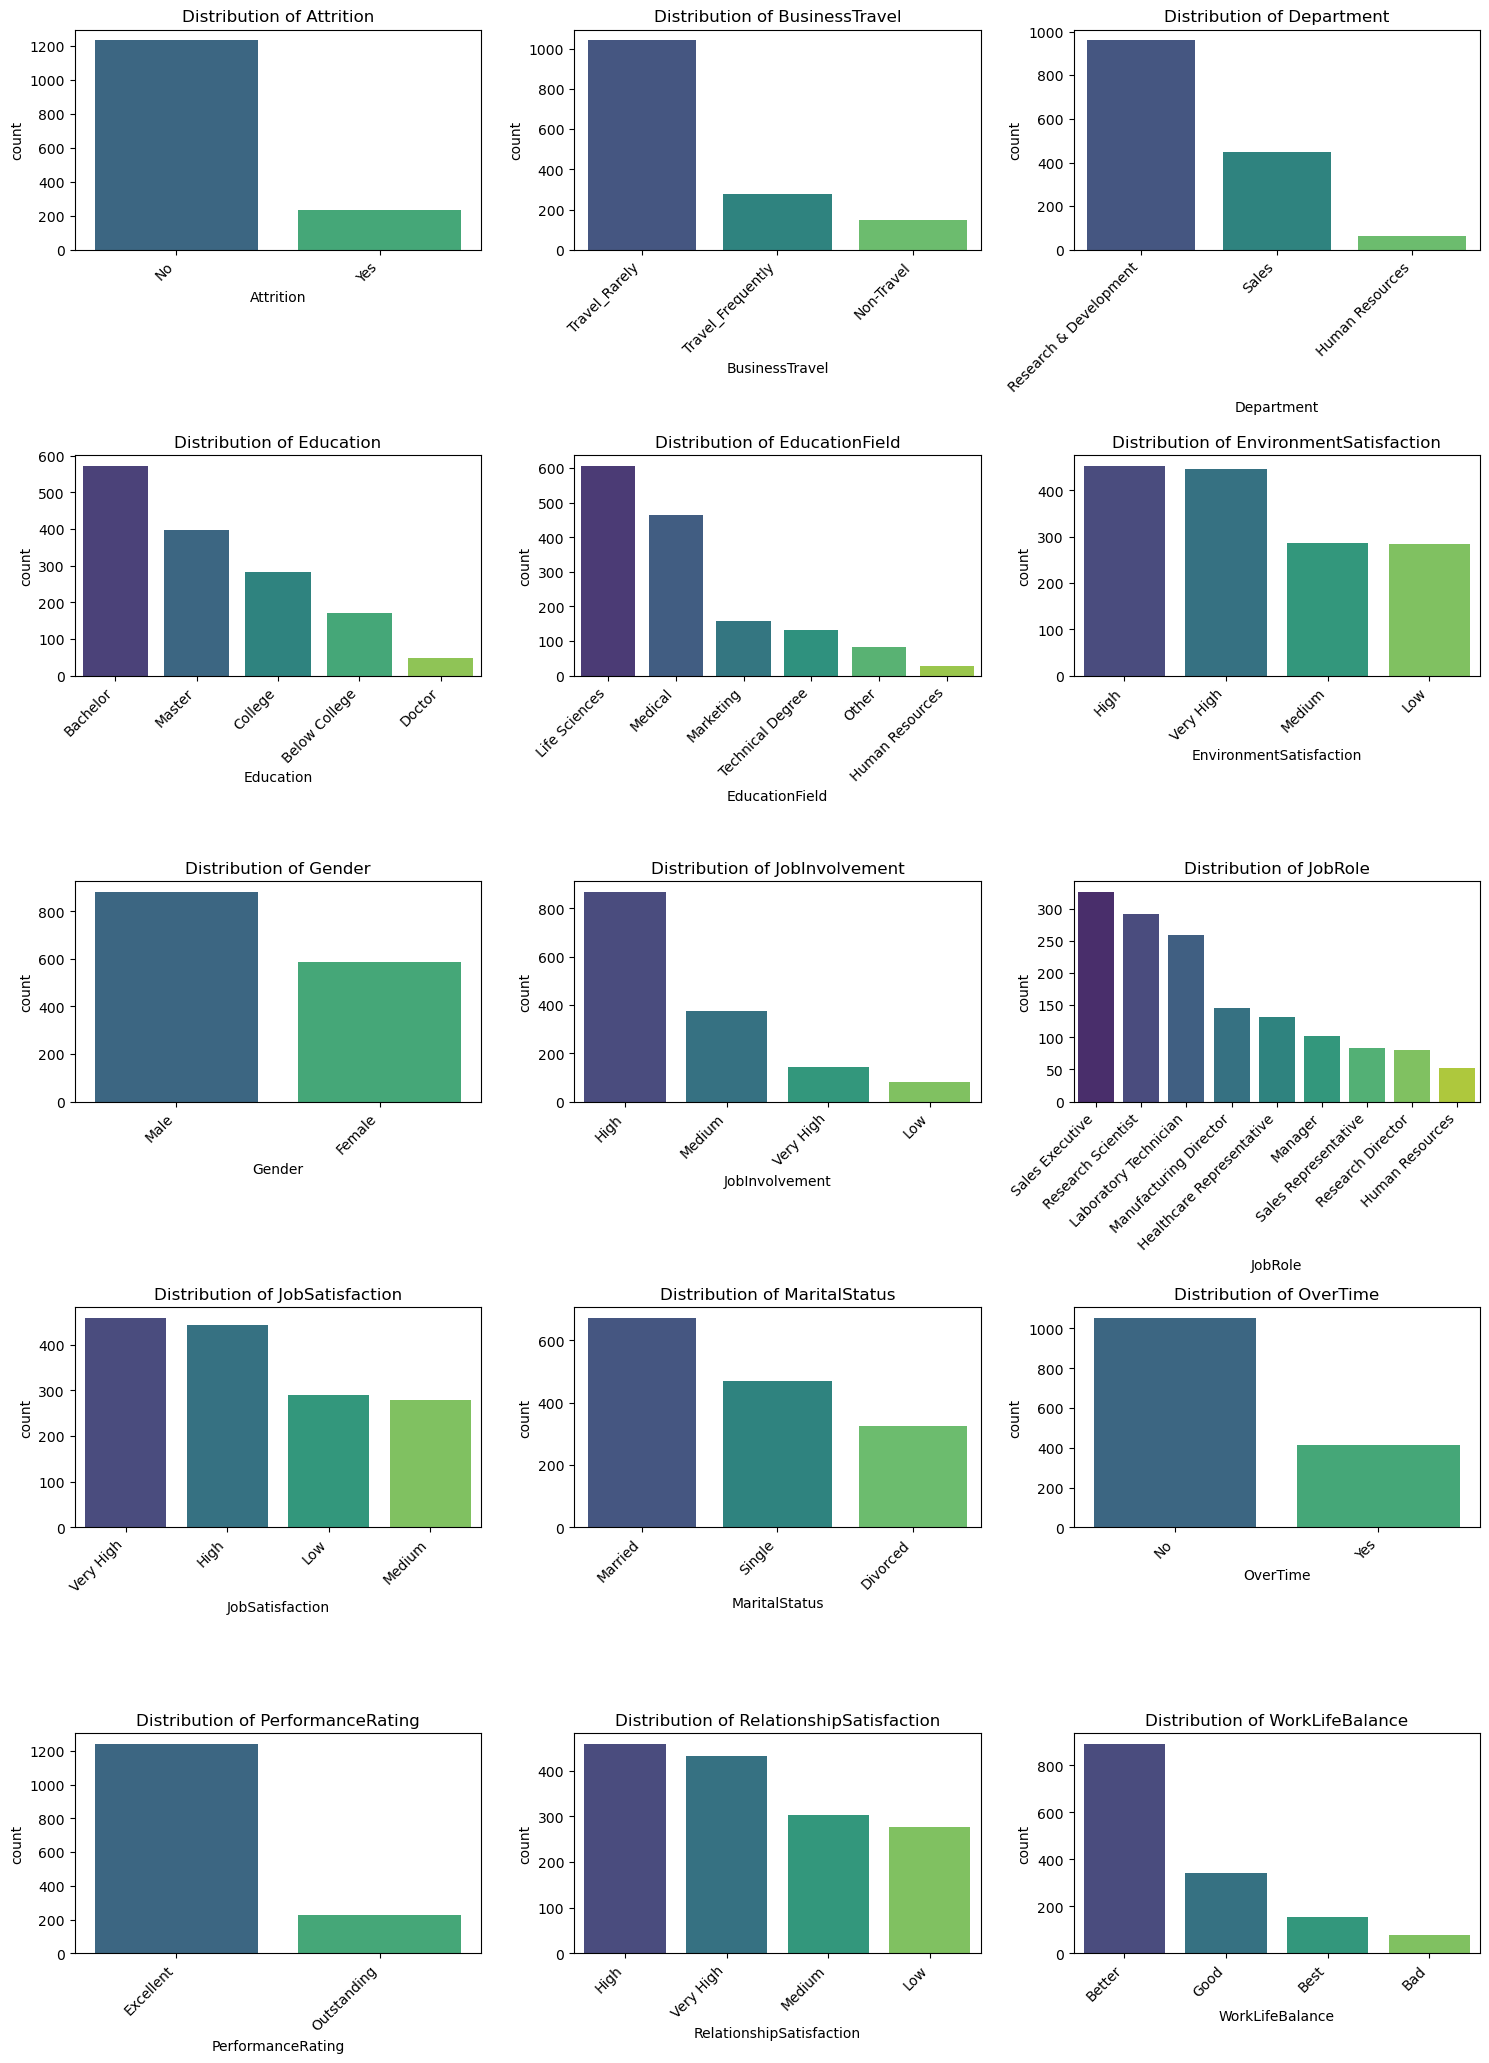

In [15]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns

fig, axes = plt.subplots(nrows=len(cat_cols)//3 + 1, ncols=3, figsize=(15, 4 * (len(cat_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Análise de Correlação

- Correlação entre as variáveis numéricas

Nosso objetivo é identificar colunas que estejam altamente correlacionadas. Essas colunas são candidatas a serem excluídas na etapa de pré processamento visto que podem estar gerando redundância nos dados.

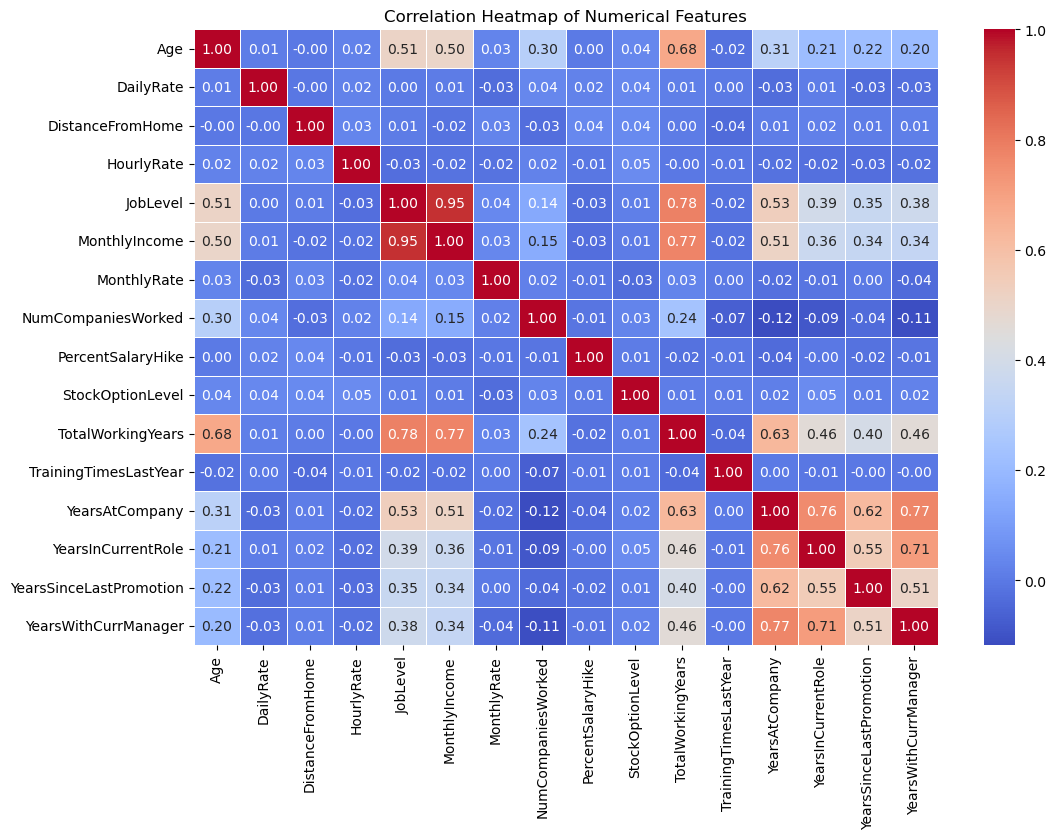

In [16]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Comparação da distribuição das colunas numéricas em relação aos valores de Attrition

Se a distribuição da categoria for visivelmente diferente para Attrition = Yes e Attrition = No, então essa variável é importante para a predição da variável alvo. 

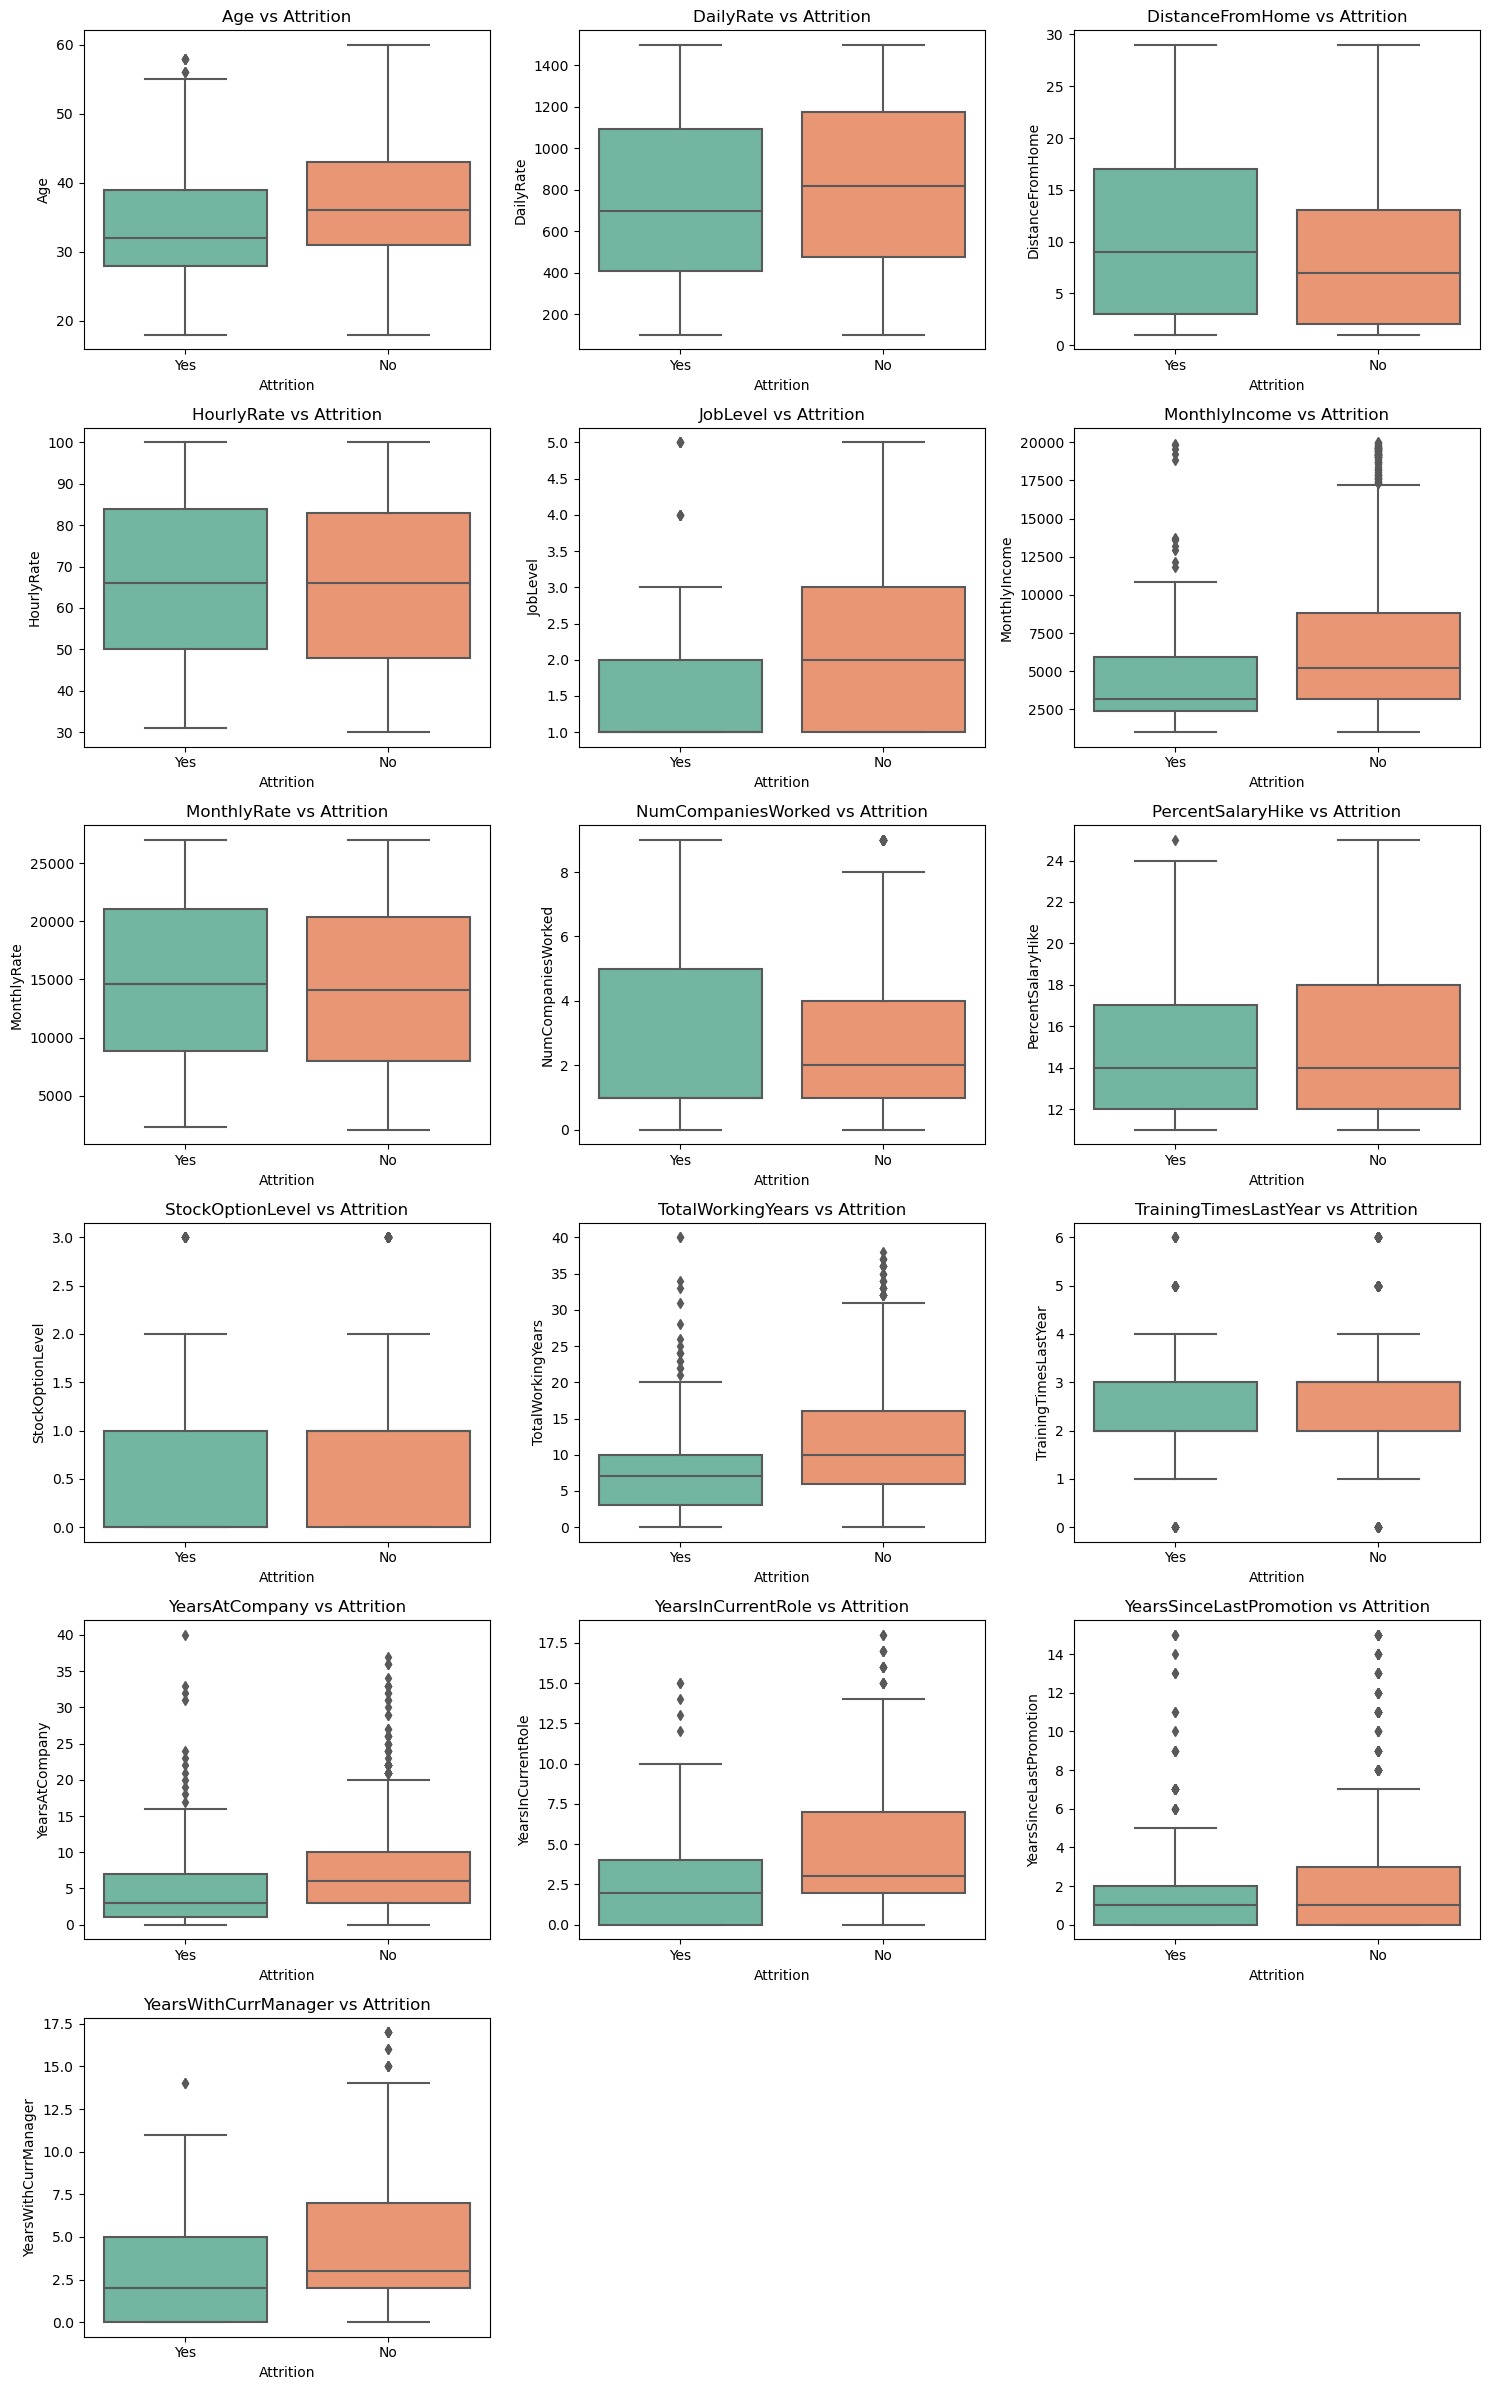

In [17]:
# Plot distribution of numerical features split by Attrition
fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(15, 4 * (len(num_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols[:]):
    sns.boxplot(x=df["Attrition"], y=df[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} vs Attrition")
    
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Relação entre colunas categoricas e Attriction

Estamos buscando variáveis que posuem valores de Attriction bem diferentes entre os diferentes valores da coluna.

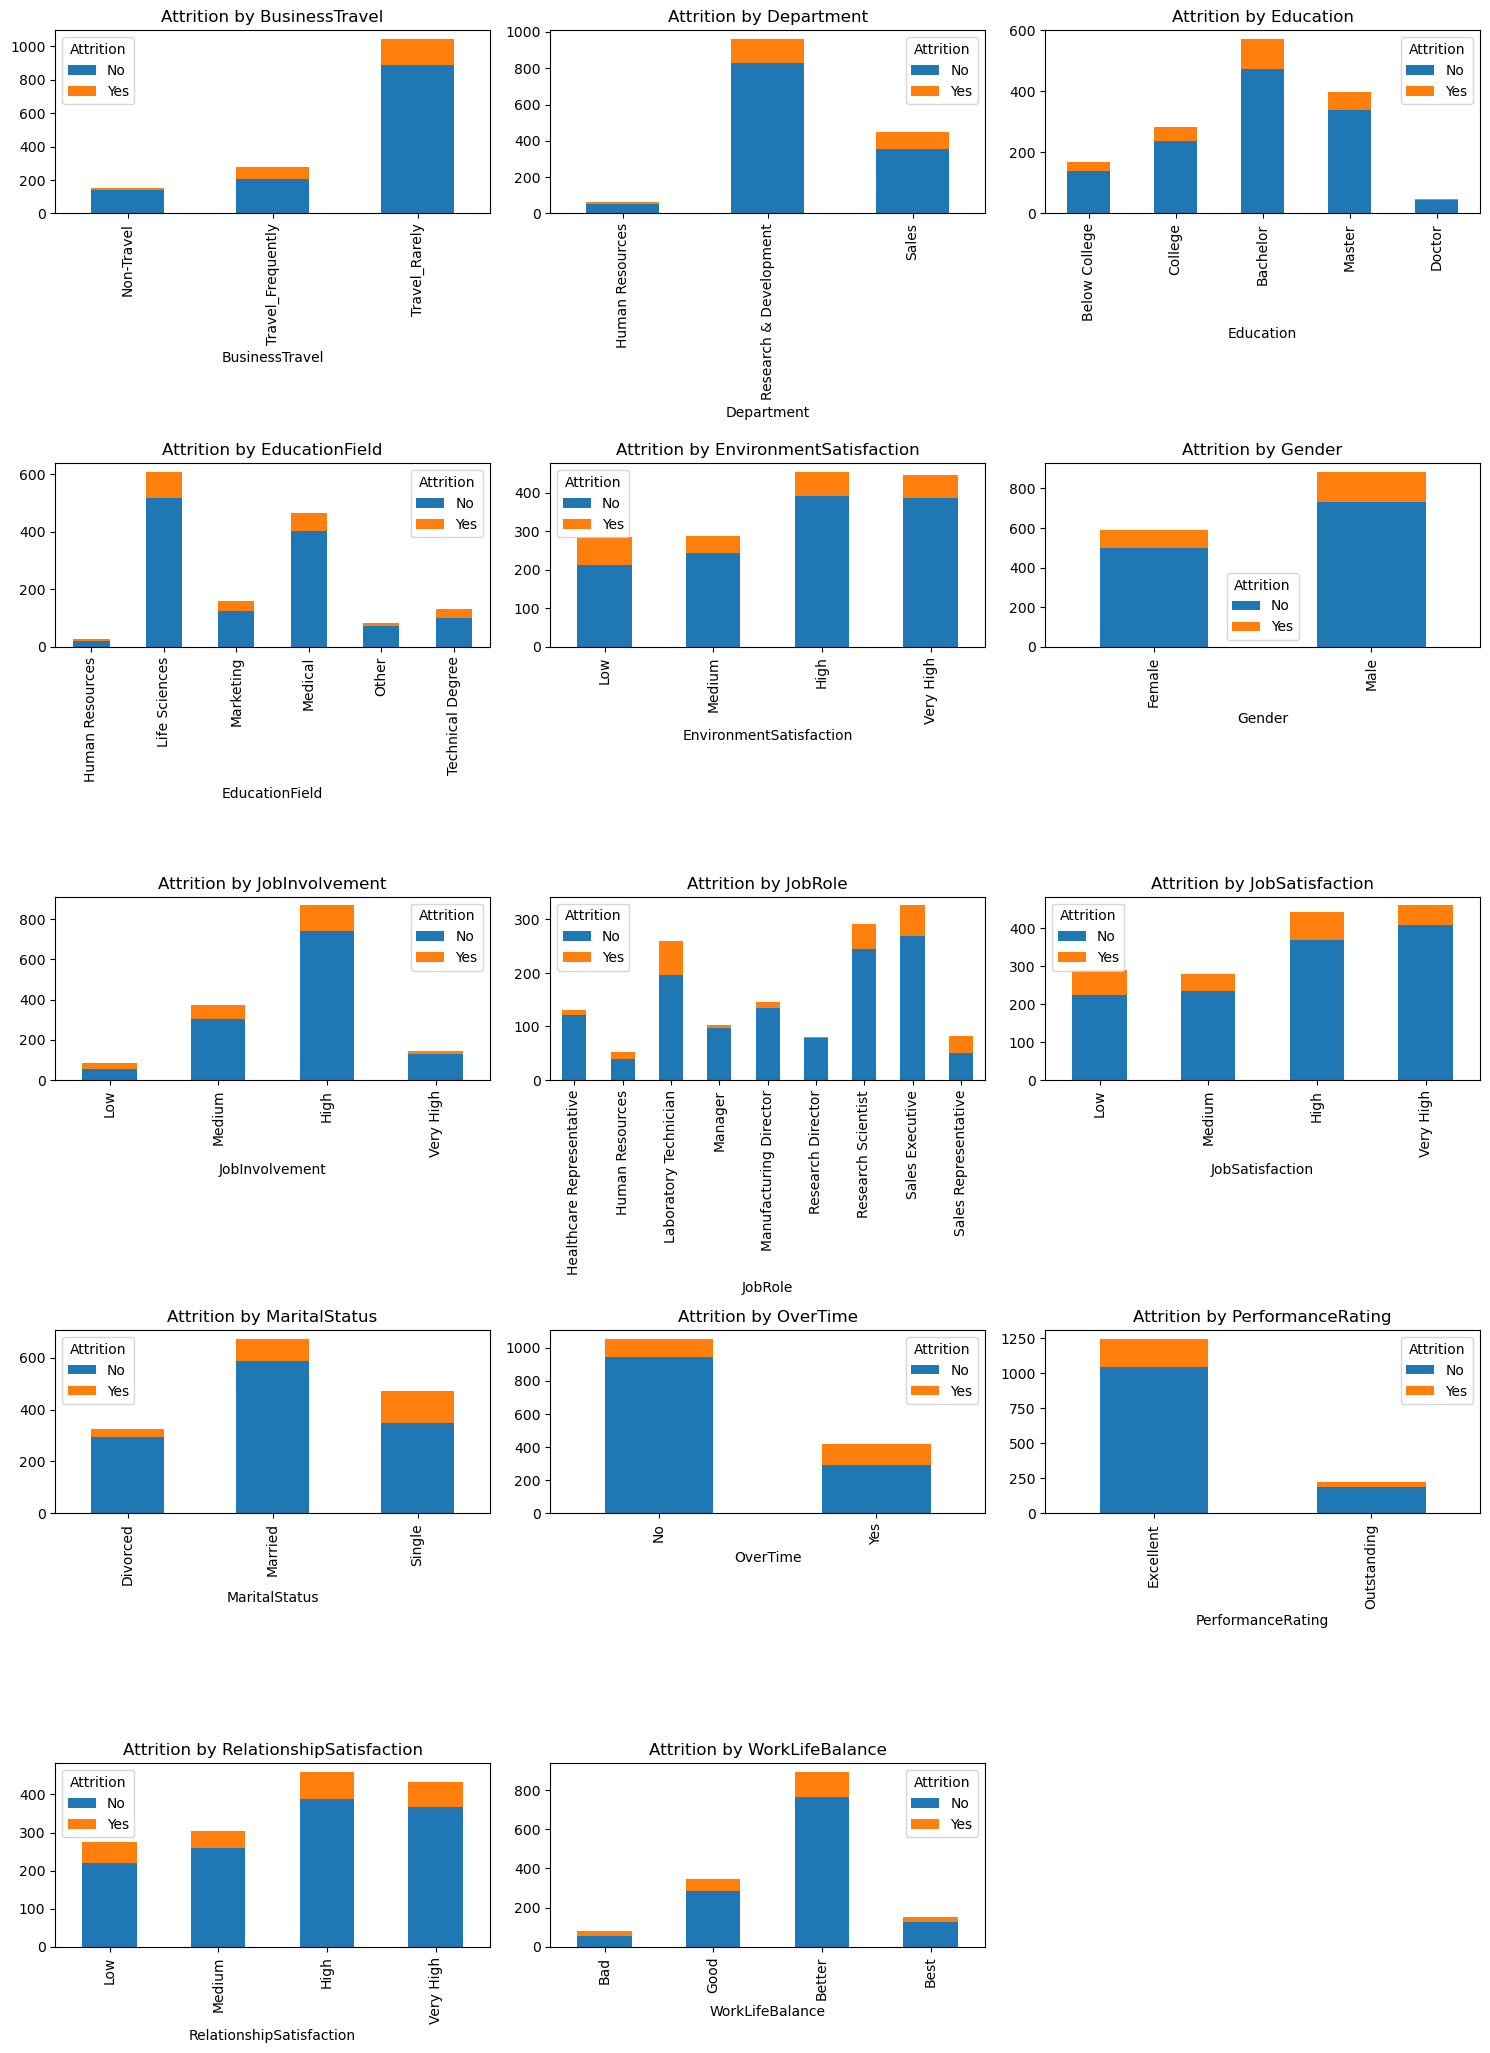

In [18]:
# Exclude Attrition itself
cat_cols = [col for col in cat_cols if col != "Attrition"]

# Plot categorical distributions
fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(15, 4 * (len(num_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:]):  # Show first 9 categorical features
    attrition_counts = df.groupby([col, "Attrition"]).size().unstack()
    attrition_counts.plot(kind="bar", stacked=True, ax=axes[i])
    axes[i].set_title(f"Attrition by {col}")
    
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Detecção de Outliers

In [19]:
def check_normality(df, cols):
    normal_features = []
    skewed_features = []
    
    for col in cols:
        data = df[col]

        # Shapiro-Wilk Test (More reliable for small datasets)
        stat, p = shapiro(data)  

        if p > 0.05:
            normal_features.append(col)  # Feature is approximately normal
        else:
            skewed_features.append(col)  # Feature is likely skewed
    
    return normal_features, skewed_features

In [20]:
normal_cols, skewed_cols = check_normality(df, num_cols)

print("Features following a normal distribution:", normal_cols)
print("Features that are skewed:", skewed_cols)

Features following a normal distribution: []
Features that are skewed: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Visto que nenhuma coluna passou no teste de normalidade, iremos utilizar o IQR como método para detecção de outliers

In [21]:
outliers_dict = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Store outliers separately
    outliers_dict[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [22]:
outliers_dict["MonthlyIncome"]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,Bachelor,Other,High,Female,58,High,5,Manager,High,Divorced,19094,10735,4,No,11,Excellent,Very High,1,26,3,Good,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,Master,Marketing,Medium,Female,83,High,5,Manager,Low,Single,18947,22822,3,No,12,Excellent,Very High,0,22,2,Good,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,Bachelor,Technical Degree,Medium,Female,49,High,5,Research Director,High,Married,19545,16280,1,No,12,Excellent,Very High,0,23,0,Better,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,College,Medical,Medium,Female,43,Medium,5,Research Director,High,Divorced,18740,16701,5,Yes,12,Excellent,Very High,1,29,2,Good,27,3,13,8
105,59,No,Non-Travel,1420,Human Resources,2,Master,Human Resources,High,Female,32,Medium,5,Manager,Very High,Married,18844,21922,9,No,21,Outstanding,Very High,1,30,3,Better,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,Sales,21,Bachelor,Life Sciences,Very High,Female,72,High,4,Manager,Very High,Married,17875,11761,4,Yes,13,Excellent,High,1,29,2,Good,1,0,0,0
1377,49,No,Travel_Frequently,1064,Research & Development,2,Below College,Life Sciences,Medium,Male,42,High,5,Research Director,Very High,Married,19161,13738,3,No,15,Excellent,Very High,0,28,3,Better,5,4,4,3
1401,55,No,Travel_Rarely,189,Human Resources,26,Master,Human Resources,High,Male,71,Very High,5,Manager,Medium,Married,19636,25811,4,Yes,18,Excellent,Low,1,35,0,Better,10,9,1,4
1437,39,No,Non-Travel,105,Research & Development,9,Bachelor,Life Sciences,Very High,Male,87,High,5,Manager,Very High,Single,19431,15302,2,No,13,Excellent,High,0,21,3,Good,6,0,1,3


# 2 - Limpeza de Dados e Pré-Processamento

In [23]:
def analyze_outliers(df, outliers_dict):
    outlier_decisions = {}
    total_rows = len(df)
    
    for col in list(outliers_dict.keys()):
        if not outliers_dict[col].empty:

            num_outliers = len(outliers_dict[col])
            percent_outliers = (num_outliers / total_rows) * 100

            # Descriptive statistics BEFORE handling outliers
            mean_before = df[col].mean()
            median_before = df[col].median()
            std_before = df[col].std()

            # Descriptive statistics AFTER removing outliers
            df_no_outliers = df[~df.index.isin(outliers_dict[col].index)]
            mean_after = df_no_outliers[col].mean()
            median_after = df_no_outliers[col].median()
            std_after = df_no_outliers[col].std()
            
            correlation_before = df.corr(numeric_only = True)[col].drop(col)
            correlation_after = df_no_outliers.corr(numeric_only = True)[col].drop(col)
            
            # If outliers affect mean & median significantly → Consider removal or transformation
            if abs(mean_before - mean_after) > 0.2 * std_before or abs(median_before - median_after) > 0.2 * std_before:
                decision = "Remove"
    
            # If outliers affect correlations → Consider transformation instead of removal
            correlation_diff = (correlation_before - correlation_after).abs().mean()
            if correlation_diff > 0.1:
                decision = "Transform"
    
            # If % of outliers is low (<2%) and they don’t affect statistics → Keep them
            if percent_outliers < 2:
                decision = "Keep"
            
            outlier_decisions[col] = {
            "Outliers (%)": round(percent_outliers, 2),
            "Mean Before": round(mean_before, 2),
            "Mean After": round(mean_after, 2),
            "Median Before": round(median_before, 2),
            "Median After": round(median_after, 2),
            "Std Before": round(std_before, 2),
            "Std After": round(std_after, 2),
            "Correlation Impact": round(correlation_diff, 3),
            "Decision": decision
            }
            
            outlier_decisions_df = pd.DataFrame.from_dict(outlier_decisions, orient="index")

    return outlier_decisions_df

In [24]:
outlier_decisions = analyze_outliers(df, outliers_dict)
outlier_decisions

,Outliers (%),Mean Before,Mean After,Median Before,Median After,Std Before,Std After,Correlation Impact,Decision
MonthlyIncome,7.76,6502.93,5502.76,4919.0,4643.0,4707.96,3319.85,0.038,Remove
NumCompaniesWorked,3.54,2.69,2.46,2.0,1.0,2.50,2.23,0.009,Remove
StockOptionLevel,5.78,0.79,0.66,1.0,1.0,0.85,0.67,0.021,Remove
TotalWorkingYears,4.29,11.28,10.32,10.0,9.0,7.78,6.45,0.023,Remove
TrainingTimesLastYear,16.19,2.80,2.54,3.0,2.0,1.29,0.75,0.022,Remove
YearsAtCompany,7.07,7.01,5.75,5.0,5.0,6.13,4.02,0.082,Remove
YearsInCurrentRole,1.43,4.23,4.06,3.0,3.0,3.62,3.36,0.019,Keep
YearsSinceLastPromotion,7.28,2.19,1.48,1.0,1.0,3.22,2.00,0.074,Remove
YearsWithCurrManager,0.95,4.12,4.01,3.0,3.0,3.57,3.38,0.011,Keep


Após analisar os resultados, decidi retirar os outliers da coluna MonthlyIncome

In [25]:
# Remove outliers from MonthlyIncome
df = df[~df.index.isin(outliers_dict["MonthlyIncome"].index)]

In [26]:
print(f"Dataset Shape: {df.shape}") 

Dataset Shape: (1356, 31)


### Converting Categorical Variables

- Nominal Categorical Variables:
Department, EducationField, Gender, Attrition, MaritalStatus, OverTime, BusinessTravel, JobRole

- Ordinal Categorical Variables: 
Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, WorkLifeBalance, RelationshipSatisfaction

Tratando Colunas Nominais

In [27]:
colunas_cat_nominais = ["Department", "EducationField", "Gender", "Attrition", "MaritalStatus", 
                        "OverTime", "BusinessTravel", "JobRole"]

# Convert categorical columns to NumPy array for better compatibility
df_cat_nominais = df[colunas_cat_nominais].to_numpy()

encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

df_encoded = pd.DataFrame(encoder.fit_transform(df_cat_nominais),
                          columns=encoder.get_feature_names_out(colunas_cat_nominais),
                          index=df.index)  # Maintain index

df_modelagem = pd.concat([df.drop(colunas_cat_nominais, axis=1), df_encoded], axis=1)

Tratando Colunas Ordinais

In [28]:
# Reverse the mapping
category_labels_reversed = {col: {v: k for k, v in mapping.items()} for col, mapping in category_labels.items()}

# Apply the reversed mapping to the dataframe
for col, mapping in category_labels_reversed.items():
    df_modelagem[col] = df_modelagem[col].map(mapping).astype(int)

### Scaling Numerical Features

In [29]:
scaler = MinMaxScaler()

df_modelagem[num_cols] = scaler.fit_transform(df_modelagem[num_cols])

# 3 - Tratando Balanceamento de Dados

In [30]:
df_modelagem

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Attrition_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.547619,0.715820,0.000000,2,2,0.914286,3,0.333333,4,0.320597,0.698053,0.888889,0.000000,3,1,0.000000,0.200,0.000000,1,0.150,0.235294,0.000000,0.294118,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.738095,0.126700,0.250000,1,3,0.442857,2,0.333333,2,0.265084,0.916001,0.111111,0.857143,4,4,0.333333,0.250,0.500000,3,0.250,0.411765,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,2,4,0.885714,2,0.000000,3,0.069536,0.012126,0.666667,0.285714,3,2,0.000000,0.175,0.500000,3,0.000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357143,0.923407,0.071429,4,4,0.371429,3,0.000000,3,0.122218,0.845814,0.111111,0.000000,3,3,0.000000,0.200,0.500000,3,0.200,0.411765,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.214286,0.350036,0.035714,1,1,0.142857,3,0.000000,2,0.158176,0.583738,1.000000,0.071429,3,4,0.333333,0.150,0.500000,3,0.050,0.117647,0.133333,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,2,3,0.157143,4,0.333333,4,0.100476,0.409396,0.444444,0.428571,3,3,0.333333,0.425,0.500000,3,0.125,0.117647,0.000000,0.176471,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.500000,0.365784,0.178571,1,4,0.171429,2,0.666667,1,0.577769,0.777474,0.444444,0.285714,3,1,0.333333,0.225,0.833333,3,0.175,0.411765,0.066667,0.411765,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.214286,0.037938,0.107143,3,2,0.814286,4,0.333333,2,0.330181,0.123670,0.111111,0.642857,4,2,0.333333,0.150,0.000000,3,0.150,0.117647,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,0.738095,0.659270,0.035714,3,4,0.471429,2,0.333333,2,0.281809,0.447661,0.222222,0.214286,3,4,0.000000,0.425,0.500000,2,0.225,0.352941,0.000000,0.470588,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X = df_modelagem.drop(columns=["Attrition_Yes"])
y = df_modelagem["Attrition_Yes"]  

In [32]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X,y)
X_resampled = pd.DataFrame(X_resampled,columns=X.columns)

# 4 - Aplicando PCA

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Devemos aplicar PCA apenas no conjunto de dados de treino para evitar Data leakege (dados do conjunto de teste influenciam no treino, levando a um modelo que não generaliza bem para novos casos)

In [34]:
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

# 5 - Treinamento do Modelo

In [36]:
rf_original = RandomForestClassifier(n_estimators=100, random_state=44)
rf_original.fit(X_train, y_train)

y_pred = rf_original.predict(X_test)

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)

# 6 - Avaliação do Modelo

In [38]:
def evaluate_model(y_true, y_pred, class_labels=None):
    
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, average='weighted') * 100
    recall = recall_score(y_true, y_pred, average='weighted') * 100
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall"],
        "Value": [f"{accuracy:.2f}%", f"{precision:.2f}%", f"{recall:.2f}%"]
    })

    return metrics_df

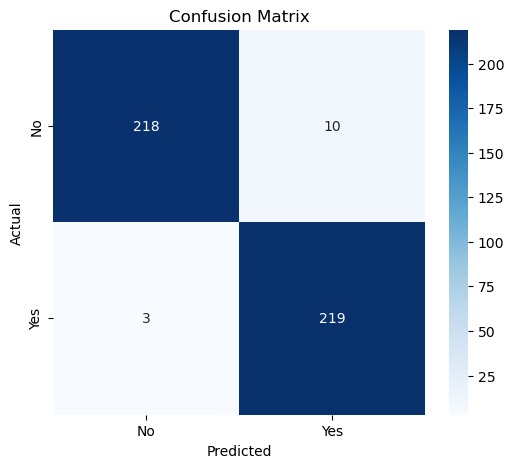

      Metric   Value
0   Accuracy  97.11%
1  Precision  97.16%
2     Recall  97.11%


In [39]:
metrics = evaluate_model(y_test, y_pred, class_labels=["No", "Yes"])
print(metrics)

# 7 - Features Mais Importantes 

In [47]:
def plot_feature_importance(model, feature_names, top_n=10):

    # Obter a importância das features
    feature_importances = model.feature_importances_
    
    # Criar um DataFrame ordenado pela importância (do maior para o menor)
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_df = feature_df.sort_values(by="Importance", ascending=False).head(top_n)
    
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_df, palette="Blues_r", order=feature_df["Feature"])
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top {top_n} Most Important Features for Attrition Classification")
    plt.show()

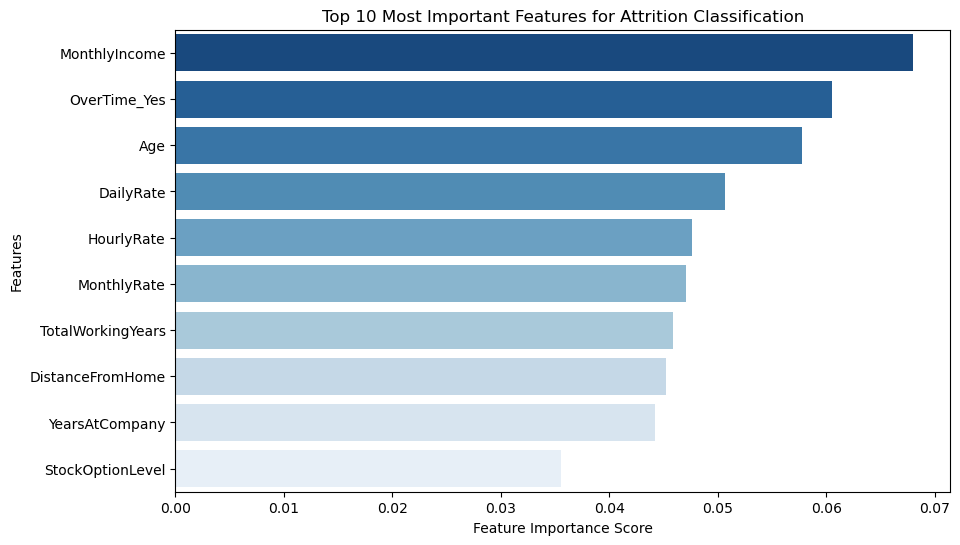

In [48]:
plot_feature_importance(rf_original, feature_names=X_train.columns, top_n=10)